<a href="https://colab.research.google.com/github/notSahil/pytudes/blob/main/python/pandas_read_html_for_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using pandas read_html to Web Scrape Data for Data Science** 

Chanin Nantasenamat

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping NBA player stats data and perform a quick data exploration.

## **URL to the webpage "2018-19 NBA Player Stats: Per Game"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [7]:
# The Building Blocks
year = '2019'
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = url_link.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

Now, let's programmatically return a list of URL given a list of years (e.g. 2015,2016,2017,2018,2019).

In [8]:
years = [2015,2016,2017,2018,2019]
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = url_link.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


Method 2

In [9]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

## **Read HTML webpage into pandas**

In [11]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [16]:
df = pd.read_html(url, header = 0)
df

[      Rk        Player Pos Age   Tm   G  GS  ...  TRB  AST  STL  BLK  TOV   PF   PTS
 0      1  Álex Abrines  SG  25  OKC  31   2  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
 1      2    Quincy Acy  PF  28  PHO  10   0  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
 2      3  Jaylen Adams  PG  22  ATL  34   1  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
 3      4  Steven Adams   C  25  OKC  80  80  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
 4      5   Bam Adebayo   C  21  MIA  82  28  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9
 ..   ...           ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...
 729  528  Tyler Zeller   C  29  MEM   4   1  ...  4.5  0.8  0.3  0.8  1.0  4.0  11.5
 730  529    Ante Žižić   C  22  CLE  59  25  ...  5.4  0.9  0.2  0.4  1.0  1.9   7.8
 731  530   Ivica Zubac   C  21  TOT  59  37  ...  6.1  1.1  0.2  0.9  1.2  2.3   8.9
 732  530   Ivica Zubac   C  21  LAL  33  12  ...  4.9  0.8  0.1  0.8  1.0  2.2   8.5
 733  530   Ivica Zubac   C  21  LAC  26  25  ...  7.7

### How many tables are there in the webpage?

In [17]:
len(df)

1

### Select the first table

In [18]:
df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [19]:
df2019 = df[0]

## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [20]:
df2019[df2019.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
70,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
97,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
132,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
161,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
186,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
217,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
244,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
269,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [21]:
len(df2019[df2019.Age == 'Age'])

26

In [22]:
df = df2019.drop(df2019[df2019.Age == 'Age'].index)

In [23]:
df.shape

(708, 30)

## Quick Exploratory Data Analysis

In [24]:
import seaborn as sns

Making the histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


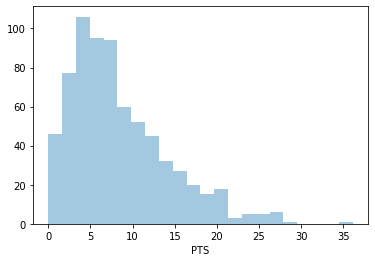

In [25]:
sns.distplot(df.PTS, 
             kde=False)

Change bar line color

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


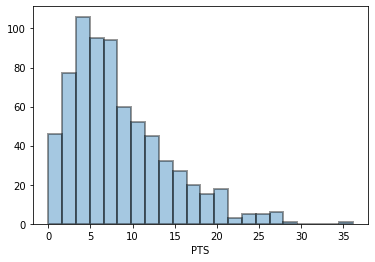

In [26]:
sns.distplot(df.PTS, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


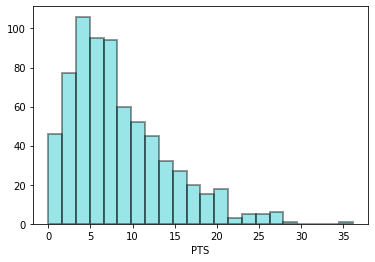

In [27]:
sns.distplot(df.PTS,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')